In [24]:
import numpy as np  #Importa libreria numerica 
import sympy as sym #simbolica
import matplotlib.pyplot as plt #importa matplotlib solo pyplot
import matplotlib.image as mpimg 
from sympy.plotting import plot  #para plotear 2 variables
from sympy.plotting import plot3d  # para 3
from sympy.plotting import plot3d_parametric_surface
from IPython.display import Image 
import ipympl  #Para importar gestor de imagenes 
sym.init_printing() #activa a jupyter para mostrar simbolicamente el output

#%matplotlib widget
%matplotlib inline

#TODOS LOS display() ESTAN COMENTADOS porque github NO muestra bien las expresiónes

In [25]:
V1, V2, VD, VC = sym.symbols('V_1, V_2, V_D, V_C')
R1, R2, R3, R4, R5, R = sym.symbols('R1, R2, R3, R4, R5, R')
# Se analiza aprovechando la linealidad y el principio de la superposición, 
# analizando cada variable pasivando las otras.
Vo1 = sym.Function('Vo_1')(V1,V2) #Defino viarible simbolica Vo1 como una funcion de V1 y V2 
eq_Vo1=sym.Eq(Vo1,(sym.diff(Vo1.subs(V2,0),V1))*V1+(sym.diff(Vo1.subs(V1,0),V2)*V2))
#eq_Vo1 es la variable importante. Tiene 2 partes eq_Vo1.lhs y eq_Vo1.rhs 
#eq_Vo1 la parte izquierda lhs es Vo1 , y la parte derecha es la función "expresión matemática simbólica"
#display(eq_Vo1)
sym.pprint(eq_Vo1)
#Además si se muestra en display como Vo1=F(V1,V2)
#Si no hiciera esto e igualo simplemente Vo1=F(V1,V2)
#Al imprimir Vo1 solo muestra F(V1,V2)
#Al usar la variable eq_Vo1 tambien podemos imprimir d(Vo1)/dV1 = F'(V1,V2)
# y usarla para los informes en latex
sym.print_latex(eq_Vo1)

Vo1 = sym.Symbol('Vo_1') #Define simbolicamente Vo1 como una variable. Esto es por el analisis al circuito.
Vo2 = sym.Function('Vo_2')(V1,V2,Vo1)
eq_Vo2 = sym.Eq(Vo2,(sym.diff(Vo2.subs({V2:0,Vo1:0}),V1)*V1
                    +sym.diff(Vo2.subs({V1:0,Vo1:0}),V2)*V2
                    +sym.diff(Vo2.subs({V1:0,V2:0}),Vo1)*Vo1))
#display(eq_Vo2)
sym.pprint(eq_Vo2)

                  d                    d             
Vo₁(V₁, V₂) = V₁⋅───(Vo₁(V₁, 0)) + V₂⋅───(Vo₁(0, V₂))
                 dV₁                  dV₂            
\operatorname{Vo_{1}}{\left(V_{1},V_{2} \right)} = V_{1} \frac{d}{d V_{1}} \operatorname{Vo_{1}}{\left(V_{1},0 \right)} + V_{2} \frac{d}{d V_{2}} \operatorname{Vo_{1}}{\left(0,V_{2} \right)}
                       d                       d                        d                  
Vo₂(V₁, V₂, Vo₁) = V₁⋅───(Vo₂(V₁, 0, 0)) + V₂⋅───(Vo₂(0, V₂, 0)) + Vo₁⋅────(Vo₂(0, 0, Vo₁))
                      dV₁                     dV₂                      dVo₁                


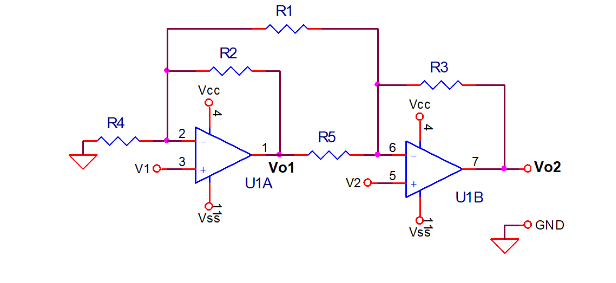

In [26]:
Image(filename='CI.png',width=600)  

In [29]:
# "Se utiliza la LKC para encontrar las derivadas paciales" 
#PRIMERO ANALISO Vo1(V1,V2=0) y SEGUNDO Vo1(V1=0,V2)

#Ecuecion cuando V2=0
#V1(G4+G2+G1)-Vo_1*G2=0 
eq_0=sym.Eq(V1*(1/R1+1/R2+1/R4)-eq_Vo1.lhs.subs(V2,0)*1/R2) # Asi se representa simbolicamente la ec.
#display(eq_0)
sym.pprint(eq_0)#Podria usar metodos de sympy para poner todo en funcion de Vo1
#Pero simplemente despejando se llega Vo1(V1,V2=0) = V1*G2*(G1+G2+G4)
eq_Vo1_V1=sym.Eq(eq_Vo1.lhs.subs(V2,0),sym.apart((V1*(1/R1+1/R2+1/R4)*R2),V1))
#el metodo .apart despeja, aparta, saca factor comun V1
#otro metodo parecido es .collect
#display(eq_Vo1_V1) #Entonces eq_Vo1_V1 representa lhs Vo1(V1,0) y rhs la expresión matematica
sym.pprint(eq_Vo1_V1)
eq_dVo1_V1=sym.Eq(sym.diff(eq_Vo1_V1.lhs,V1),sym.diff(eq_Vo1_V1.rhs,V1))
#defino Variable eq_dVo1_V1 que en lhs tiene d(Vo1(V1,V2=0))/dV1 y en rhs la expresión matemática F'(V1,0) 
#display(eq_dVo1_V1)
sym.pprint(eq_dVo1_V1)

#ahora solo remplazo todas las Resis. con R usando el metodo .subs({X:X1,...}) para muchas variables o .subs(X,X1)
#display(eq_dVo1_V1.subs({R1:R,R2:R,R3:R,R4:R,R5:R}))
sym.pprint(eq_dVo1_V1.subs({R1:R,R2:R,R3:R,R4:R,R5:R}))

   ⎛1    1    1 ⎞   Vo₁(V₁, 0)    
V₁⋅⎜── + ── + ──⎟ - ────────── = 0
   ⎝R₄   R₂   R₁⎠       R₂        
             V₁⋅(R₁⋅R₂ + R₁⋅R₄ + R₂⋅R₄)
Vo₁(V₁, 0) = ──────────────────────────
                       R₁⋅R₄           
 d                R₁⋅R₂ + R₁⋅R₄ + R₂⋅R₄
───(Vo₁(V₁, 0)) = ─────────────────────
dV₁                       R₁⋅R₄        
 d                 
───(Vo₁(V₁, 0)) = 3
dV₁                


In [31]:
# AHORA SE ANALIZA CUANDO V1=0
#La ec. de nodo V2*G1+Vo1*G2=0
eq_1=sym.Eq(V2*(1/R1)+eq_Vo1.lhs.subs(V1,0)*1/R2)
#display(eq_1)
sym.pprint(eq_1)
#Despejo Vo1=F(V1)  Se repite el procedimiento de cuando V2=0 pero con V1
eq_Vo1_V2=sym.Eq(eq_Vo1.lhs.subs(V1,0),sym.apart(-(V2*(1/R1)*R2),V2))
#display(eq_Vo1_V2)
sym.pprint(eq_Vo1_V2)
eq_dVo1_V2=sym.Eq(sym.diff(eq_Vo1_V2.lhs,V2),sym.diff(eq_Vo1_V2.rhs,V2))
#display(eq_dVo1_V2)
sym.pprint(eq_dVo1_V2)
#display(eq_dVo1_V2.subs({R1:R,R2:R,R3:R,R4:R,R5:R}))
sym.pprint(eq_dVo1_V2.subs({R1:R,R2:R,R3:R,R4:R,R5:R}))

Vo₁(0, V₂)   V₂    
────────── + ── = 0
    R₂       R₁    
             -R₂⋅V₂ 
Vo₁(0, V₂) = ───────
                R₁  
 d                -R₂ 
───(Vo₁(0, V₂)) = ────
dV₂                R₁ 
 d                  
───(Vo₁(0, V₂)) = -1
dV₂                 


In [32]:
#LA ECUACIÓN FINAL ES  Vo1 = Vo1_V1 + Vo1_V2
#Utilizo la variable eq_Vo1 donde en rhs tenia d(Vo1(V1,0))/d(V1) * V1 + d(Vo1 ... 
eq_Vo1=sym.Eq(eq_Vo1.lhs,(eq_Vo1_V1.rhs+eq_Vo1_V2.rhs)) # y ahora rhs tiene la expresión matematica resultante
#display(eq_Vo1)
sym.pprint(eq_Vo1)
eq_Vo1_R=sym.Eq(eq_Vo1.lhs,(eq_Vo1.rhs).subs({R1:R,R2:R,R3:R,R4:R,R5:R}))
#display(eq_Vo1_R)
sym.pprint(eq_Vo1_R)

                R₂⋅V₂   V₁⋅(R₁⋅R₂ + R₁⋅R₄ + R₂⋅R₄)
Vo₁(V₁, V₂) = - ───── + ──────────────────────────
                  R₁              R₁⋅R₄           
Vo₁(V₁, V₂) = 3⋅V₁ - V₂


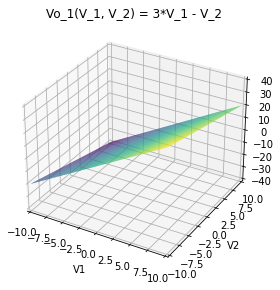

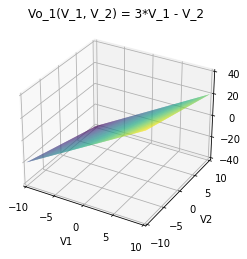

In [33]:
#Plot 3D y guarda /tmp/Vo1__V1_V2.png
plt=plot3d_parametric_surface( V1, V2, eq_Vo1_R.rhs, (V1, -10,10),(V2, -10,10),
                              show=False, title="%s = %s"%(str(eq_Vo1_R.lhs),str(eq_Vo1_R.rhs)),
                              xlabel="V1", ylabel="V2")
plt.show()
plt.save("./plot/Vo1__V1_V2.png")
#guarda imagen en una carpeta plot para luego usarlo en los informes
# amarillo es el valor mas alto de Vo1
# Violeta es el valor mas bajo de Vo1(V1,V2)

                V_C⋅(R₂ + R₄)   V_D⋅(-R₁⋅R₂ - R₁⋅R₄ - 2⋅R₂⋅R₄)
Vo₁(V_D, V_C) = ───────────── + ──────────────────────────────
                      R₄                   2⋅R₁⋅R₄            
Vo₁(V₁, V₂) = 3⋅V₁ - V₂


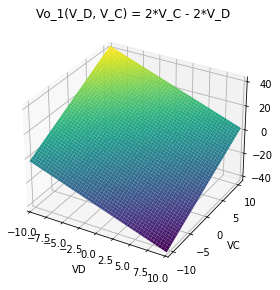

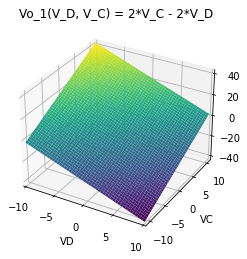

In [34]:
#Para representar Vo1=F(VD , VC) simplemente remplazo usando el metodo .subs V1=Vc-Vd/2 y V2=Vc+Vd/2
Vo1 = sym.Function('Vo_1')(VD,VC)
eq_Vo1_Vcd=sym.Eq(Vo1,sym.collect(sym.apart((eq_Vo1.rhs).subs({V1:(VC-(VD/2)),V2:(VC+(VD/2))}),VC),VD))
#Aca uso los dos metodos .collect y .apart para apartar VC y VD
#display(eq_Vo1_Vcd)
sym.pprint(eq_Vo1_Vcd)
eq_Vo1_Vcd_R=sym.Eq(Vo1,(eq_Vo1_Vcd.rhs).subs({R1:R,R2:R,R3:R,R4:R,R5:R}))
#display(eq_Vo1_Vcd_R)
sym.pprint(eq_Vo1_R)
plt=plot3d(eq_Vo1_Vcd_R.rhs, (VD, -10,10),(VC, -11,11),
           title="%s = %s"% (str(eq_Vo1_Vcd_R.lhs),str(eq_Vo1_Vcd_R.rhs)),
           xlabel="VD", ylabel="VC",show=False)
plt.show()
plt.save("./plot/Vo1__VD_VC.png")


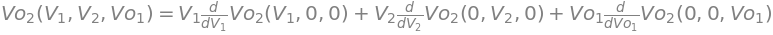

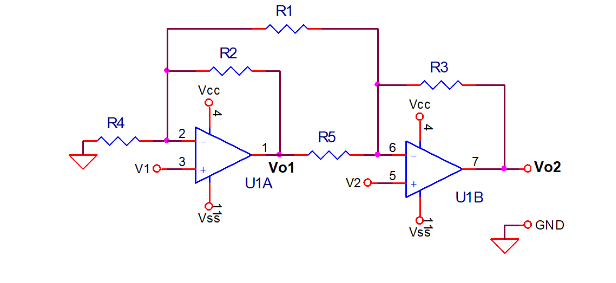

In [38]:
#Repito el codigo de arriba 
Vo1 = sym.Symbol('Vo_1')
Vo2 = sym.Function('Vo_2')(V1,V2,Vo1)
eq_Vo2 = sym.Eq(Vo2,(sym.diff(Vo2.subs({V2:0,Vo1:0}),V1)*V1
                    +sym.diff(Vo2.subs({V1:0,Vo1:0}),V2)*V2
                    +sym.diff(Vo2.subs({V1:0,V2:0}),Vo1)*Vo1))
display(eq_Vo2)
Image(filename='CI.png',width=600)  

In [49]:
# Ahora se busca Vo2 como cuando V1=0 Vo1~= 0 
# porque para cumplir que la corriente de I(R1)+I(R2)=0 Vo1 no puede ser cero
# Entonces se analiza como otra variable y luego se remplaza por la expresión encontrada
# En el analisis de Vo1 no se uso Vo2 como variable ind. porque no afectaba
# En V1=0 la ec. de nodo en 2 no es afectada por Vo2 y V2=0 la ec de nodo en 2 tmp  
# encambio ahora si afecta.   Eq: V1=0
Vo1 = sym.Symbol('Vo_1')
Vo2 = sym.Function('Vo_2')(V1,V2,Vo1)

eq_0=sym.Eq(V1*(1/R1)+eq_Vo2.lhs.subs({V2:0, Vo1:0})*1/R3)
#display(eq_0)
sym.pprint(eq_0)
eq_Vo2_V1=sym.Eq(eq_Vo2.lhs.subs({V2:0, Vo1:0}),sym.apart((V1*(1/R1)*-R3),V1))
#display(eq_Vo2_V1)
sym.pprint(eq_Vo2_V1)
eq_dVo2_V1=sym.Eq(sym.diff(eq_Vo2_V1.lhs,V1),sym.diff(eq_Vo2_V1.rhs,V1))
#display(eq_dVo2_V1)
sym.pprint(eq_dVo2_V1)
#display(eq_dVo2_V1.subs({R1:R,R2:R,R3:R,R4:R,R5:R}))
sym.pprint(eq_dVo2_V1.subs({R1:R,R2:R,R3:R,R4:R,R5:R}))

Vo₂(V₁, 0, 0)   V₁    
───────────── + ── = 0
      R₃        R₁    
                -R₃⋅V₁ 
Vo₂(V₁, 0, 0) = ───────
                   R₁  
 d                   -R₃ 
───(Vo₂(V₁, 0, 0)) = ────
dV₁                   R₁ 
 d                     
───(Vo₂(V₁, 0, 0)) = -1
dV₁                    


In [50]:
#ec V2=0 CLARAMENTE se ve que se repite una y otra vez los mismos pasos, metodos, eq.
#Pero ahora se pasivan dos nodos
eq_1=sym.Eq(V2*(1/R1+1/R3+1/R5)-eq_Vo2.lhs.subs({V1:0,Vo1:0})*1/R3)
#display(eq_1)
sym.pprint(eq_1)
eq_Vo2_V2=sym.Eq(eq_Vo2.lhs.subs({V1:0,Vo1:0}),sym.apart((V2*(1/R1+1/R3+1/R5)*R3),V2))
#display(eq_Vo2_V2)
sym.pprint(eq_Vo2_V2)
eq_dVo2_V2=sym.Eq(sym.diff(eq_Vo2_V2.lhs,V2),sym.diff(eq_Vo2_V2.rhs,V2))
#display(eq_dVo2_V2)
sym.pprint(eq_dVo2_V2)
sym.pprint(eq_dVo2_V2.subs({R1:R,R2:R,R3:R,R4:R,R5:R}))


   ⎛1    1    1 ⎞   Vo₂(0, V₂, 0)    
V₂⋅⎜── + ── + ──⎟ - ───────────── = 0
   ⎝R₅   R₃   R₁⎠         R₃         
                V₂⋅(R₁⋅R₃ + R₁⋅R₅ + R₃⋅R₅)
Vo₂(0, V₂, 0) = ──────────────────────────
                          R₁⋅R₅           
 d                   R₁⋅R₃ + R₁⋅R₅ + R₃⋅R₅
───(Vo₂(0, V₂, 0)) = ─────────────────────
dV₂                          R₁⋅R₅        
 d                    
───(Vo₂(0, V₂, 0)) = 3
dV₂                   


In [51]:
#Ahora analizo cuando V1=0 y V2=0
eq_2=sym.Eq(Vo1*(1/R2)+eq_Vo2.lhs.subs({V1:0,V2:0})*1/R3)
sym.pprint(eq_2)
eq_Vo2_Vo1=sym.Eq(eq_Vo2.lhs.subs({V1:0,V2:0}),Vo1*-R3/R2)
sym.pprint(eq_Vo2_Vo1)
eq_dVo2_Vo1=sym.Eq(sym.diff(eq_Vo2_Vo1.lhs,Vo1),sym.diff(eq_Vo2_Vo1.rhs,Vo1))
sym.pprint(eq_dVo2_Vo1)
sym.pprint(eq_dVo2_Vo1.subs({R1:R,R2:R,R3:R,R4:R,R5:R}))

Vo₂(0, 0, Vo₁)   Vo₁    
────────────── + ─── = 0
      R₃          R₂    
                 -R₃⋅Vo₁ 
Vo₂(0, 0, Vo₁) = ────────
                    R₂   
 d                     -R₃ 
────(Vo₂(0, 0, Vo₁)) = ────
dVo₁                    R₂ 
 d                       
────(Vo₂(0, 0, Vo₁)) = -1
dVo₁                     


In [52]:
#Vo2 TOTAL Vo2= Vo2_V1 + Vo2_V2 + Vo2_Vo1
eq_Vo2=sym.Eq(eq_Vo2.lhs,(eq_Vo2_V1.rhs+eq_Vo2_V2.rhs+eq_Vo2_Vo1.rhs))
sym.pprint(eq_Vo2)
eq_Vo2_R=sym.Eq(eq_Vo2.lhs,(eq_Vo2.rhs).subs({R1:R,R2:R,R3:R,R4:R,R5:R}))
sym.pprint(eq_Vo2_R)

                     R₃⋅Vo₁   R₃⋅V₁   V₂⋅(R₁⋅R₃ + R₁⋅R₅ + R₃⋅R₅)
Vo₂(V₁, V₂, Vo₁) = - ────── - ───── + ──────────────────────────
                       R₂       R₁              R₁⋅R₅           
Vo₂(V₁, V₂, Vo₁) = -V₁ + 3⋅V₂ - Vo₁


In [53]:
#REMPLAZO Vo1 por el encontrado
eq_Vo2=eq_Vo2.subs(Vo1,eq_Vo1.rhs)#PRIMERO Remplazo porque eq_Vo2.lhs es Vo2(V1,V2,Vo1) 
#Ahora va a ser eq_Vo2.lhs Vo2(V1,V2) 
Vo2_ = sym.Function('Vo_2')(V1,V2)
eq_Vo2=sym.Eq(Vo2_,sym.collect(sym.apart(eq_Vo2.rhs,V1),V2))
sym.pprint(eq_Vo2)
eq_Vo2_R=sym.Eq(eq_Vo2.lhs,(eq_Vo2.rhs).subs({R1:R,R2:R,R3:R,R4:R,R5:R}))
sym.pprint(eq_Vo2_R)

                V₂⋅(-R₁⋅R₃ - R₁⋅R₅ - 2⋅R₃⋅R₅)   V₁⋅(R₁⋅R₂⋅R₃ + R₁⋅R₃⋅R₄ + 2⋅R₂⋅R₃⋅R₄)
Vo₂(V₁, V₂) = - ───────────────────────────── - ─────────────────────────────────────
                            R₁⋅R₅                              R₁⋅R₂⋅R₄              
Vo₂(V₁, V₂) = -4⋅V₁ + 4⋅V₂


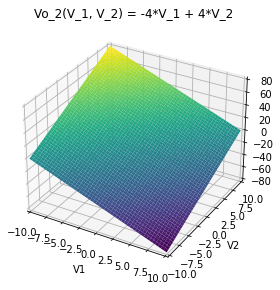

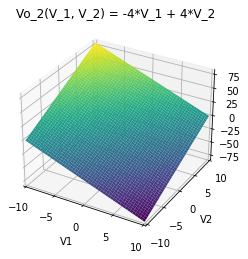

In [54]:
#Plot 3D y guarda /tmp/Vo2__V1_V2.png
plt=plot3d_parametric_surface( V1, V2, eq_Vo2_R.rhs, (V1, -10,10),(V2, -10,10),
                              show=False, title="%s = %s"%(str(eq_Vo2_R.lhs),str(eq_Vo2_R.rhs)),
                              xlabel="V1", ylabel="V2")
plt.show()
plt.save("./plot/Vo2__V1_V2.png")

                V_C⋅(R₂⋅R₃⋅R₄ - R₂⋅R₃⋅R₅ + R₂⋅R₄⋅R₅ - R₃⋅R₄⋅R₅)   V_D⋅(R₁⋅R₂⋅R
Vo₂(V_D, V_C) = ─────────────────────────────────────────────── + ────────────
                                    R₂⋅R₄⋅R₅                                  

₃⋅R₄ + R₁⋅R₂⋅R₃⋅R₅ + R₁⋅R₂⋅R₄⋅R₅ + R₁⋅R₃⋅R₄⋅R₅ + 4⋅R₂⋅R₃⋅R₄⋅R₅)
───────────────────────────────────────────────────────────────
                   2⋅R₁⋅R₂⋅R₄⋅R₅                               
Vo₂(V_D, V_C) = 4⋅V_D


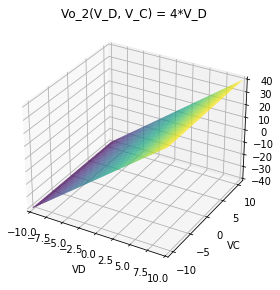

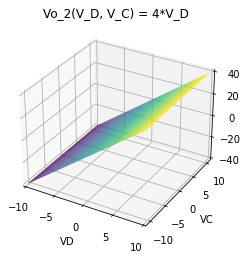

In [57]:
#LO MISMO QUE PARA Vo1(VD,VC)
Vo2 = sym.Function('Vo_2')(VD,VC)
eq_Vo2_Vcd=sym.Eq(Vo2,sym.collect(sym.apart((eq_Vo2.rhs).subs({V1:-VD/2+VC,V2:+VD/2+VC}),VC),VD))
sym.pprint(eq_Vo2_Vcd)
eq_Vo2_Vcd_R=sym.Eq(Vo2,(eq_Vo2_Vcd.rhs).subs({R1:R,R2:R,R3:R,R4:R,R5:R}))
sym.pprint(eq_Vo2_Vcd_R)

plt=plot3d(eq_Vo2_Vcd_R.rhs, (VD, -10,10),(VC, -11,11),
           title="%s = %s"% (str(eq_Vo2_Vcd_R.lhs),str(eq_Vo2_Vcd_R.rhs)),
           xlabel="VD", ylabel="VC",show=False)
plt.show()
plt.save("./plot/Vo2__VD_VC.png")


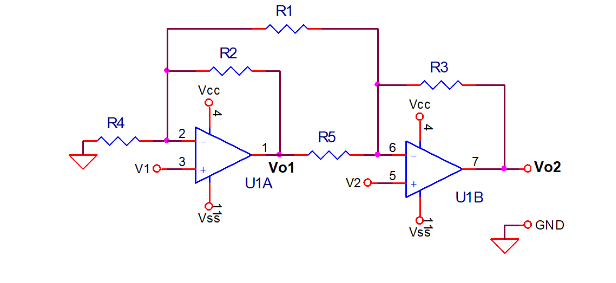

In [58]:
Image(filename='CI.png',width=600)  

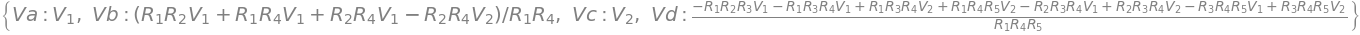

⎧            R₁⋅R₂⋅V₁ + R₁⋅R₄⋅V₁ + R₂⋅R₄⋅V₁ - R₂⋅R₄⋅V₂              -R₁⋅R₂⋅R₃⋅
⎨Va: V₁, Vb: ─────────────────────────────────────────, Vc: V₂, Vd: ──────────
⎩                              R₁⋅R₄                                          

V₁ - R₁⋅R₃⋅R₄⋅V₁ + R₁⋅R₃⋅R₄⋅V₂ + R₁⋅R₄⋅R₅⋅V₂ - R₂⋅R₃⋅R₄⋅V₁ + R₂⋅R₃⋅R₄⋅V₂ - R₃⋅
──────────────────────────────────────────────────────────────────────────────
                                         R₁⋅R₄⋅R₅                             

R₄⋅R₅⋅V₁ + R₃⋅R₄⋅R₅⋅V₂⎫
──────────────────────⎬
                      ⎭


In [63]:
#TODO LO ANTERIOR ES LA METODOLOGIA PARA CALCULAR A MANO SON TODOS LOS PASOS QUE SE DEBE DE SEGUIR
#PERO NO SE APROVECHA NADA DEL CALCULO COMPUTACIONAL. ESTA RED ACTIVA SE PUEDE CALCULAR SIMULTANEMENTE
#USANDO EL METODO DE NODOS  I=G*V 
#se puede resolver usando e metodo de cramer
#o calculando la inversas de G y V=G**-1*I
#o usando metodos de sympy
V1, V2, VD, VC = sym.symbols('V_1, V_2, V_D, V_C')
Va, Vb, Vc, Vd = sym.symbols('Va, Vb, Vc, Vd')
#Defino Va a nodo 2 Vb al nodo 1 Vc al nodo 6 y Vd al nodo 7
#entonces Vd es Vo2 y Vb es Vo1
R1, R2, R3, R4, R5, R = sym.symbols('R1, R2, R3, R4, R5, R')
Vo1 = sym.Function('Vo_1')(V1,V2)
Vo2 = sym.Function('Vo_2')(V1,V2)
#SE DEBEN DE PLANTEAR LAS MISMAS CANTIDAD DE EC. QUE DE NODOS => 4 NODOS 4 Ec.
eq__0=sym.Eq(Va,V1)
eq__1=sym.Eq(Vc,V2)
eq__2=sym.Eq(Va*(1/R4+1/R2+1/R1)-Vb/R2-Vc/R1)
eq__3=sym.Eq(Vc*(1/R5+1/R1+1/R3)-Vb/R5-Va/R1-Vd/R3)
#Metodo de sym.solve([ecuaciones],[Variables a buscar]) 
res=sym.solve([eq__0,eq__1,eq__2,eq__3],[Va,Vb,Vc,Vd])
display(res)
sym.pprint(res)

In [68]:
Vo1_=res[Vb].subs({R1:R,R2:R,R3:R,R4:R,R5:R})
display(sym.simplify(Vo1_))
display(sym.collect(sym.apart((Vo1_).subs({V1:-VD/2+VC,V2:+VD/2+VC}),VC),VD))

In [67]:
Vo2_=res[Vd].subs({R1:R,R2:R,R3:R,R4:R,R5:R})
display(sym.simplify(Vo2_))
display(sym.collect(sym.apart((Vo2_).subs({V1:-VD/2+VC,V2:+VD/2+VC}),VC),VD))